In this notebook we impliment simulated annealing algorithm.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# define a function with several local minima
# the global minimum is at 0

def f(x):
    return x**2 * (1 + np.abs(np.sin(4*x)))

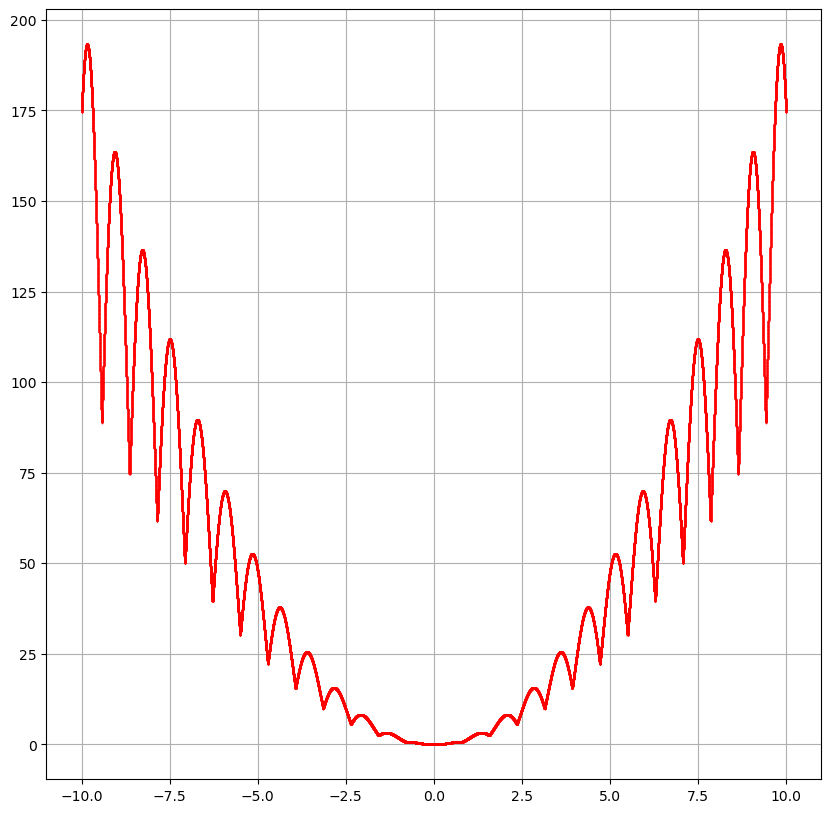

In [3]:
# plot the above function 

N = 100000
x = np.linspace(-10,10,N) 
%matplotlib inline
plt.figure(figsize=(10,10))
plt.plot(x,f(x),"r.",markersize=.5)
plt.grid()
plt.show()

We minimise the function $f(x)$ as follows. 

First, we set parameters temperature $T$ and its decay parameter $\alpha$ and choose a starting point $x_0$. 

Then we apply to $x_0$ a transformation $g$, which maps $x$ to a close point $\tilde{x}$. 

We then compute the difference of the function $f(x)$ evaluated at $x_0$ and $\tilde{x}$ as 
\begin{equation}
    \Delta 
    = 
    f(\tilde{x}) - f(x_0)
    .
\end{equation}
If the $\Delta < 0$, we set our next value $x_1 = \tilde{x}$. 

Else if for a random variable $\xi \in U(0,1)$ we have $\xi < e^{- \frac{\Delta}{T}}$, then we also set $x_1 = \tilde{x}$. 

Otherwise we keep our value and set $x_1 = x_0$. 

Finally, we reduce our temperature $T$ by a factor of $\alpha$. 

We iterate the above for a specified number of times.

In [4]:
def SA(f, g = lambda x: x + np.random.uniform(-1,1), x0 = np.random.uniform(-10,10), t0 = 100, alpha = .95, n_iter = 1000):
    # simulated annealing implementation
    # g is a transformation of x to a nearby point
    # x0 is the initial point
    # t0 is the initial temperature
    # alpha is the temperature decay parameter
    # n_iter is the number of iteration for which we run the algorithm
    
    T = t0
    x = x0
    
    for k in range(n_iter):
        
        if f(x) == 0:
            break
        
        # map x to a nearby point
        x_tilde = g(x)
        # compute the Delta
        Delta = f(x_tilde) - f(x)
        # check if a condition for the transition to x_tilde is satisfied
        if Delta < 0 or np.random.uniform(0,1) < np.exp(- Delta / T):
            x = x_tilde
            
        # reduce the temperature
        T *= alpha
    return x

In [5]:
print(f'true global minimum: 0, minimum found by simulated annealing algorithm: {SA(f)}')

true global minimum: 0, minimum found by simulated annealing algorithm: -0.0008202507674377468


We apply the algorithm to the problem of finding chessboard positions for $N$ queens that minimises the number of collisions.

In [6]:
def queens_unsafe(positions):
    # number of queens under attack (counting multiplicities)
    res = 0
    
    for i in range(len(positions)):
        j = i - 1
        while j >= 0:
            if positions[j] == (positions[i] + (i - j)):
                res += 1
                
            if positions[j] == (positions[i] - (i - j)):
                res += 1
            j -= 1
                
        j = i + 1
        while j < len(positions):
            if positions[j] == (positions[i] + (i - j)):
                res += 1
                
            if positions[j] == (positions[i] - (i - j)):
                res += 1
            j+= 1
            
    return res

def g(positions):
    # permute a pair of positions
    i, j = 0, 0
    while i == j:
        i = np.random.randint(0,len(positions))
        j = np.random.randint(0,len(positions))
    
    positions[i],  positions[j] = positions[j],  positions[i]
    
    return positions

In [7]:
N = 8

positions = list(range(N))

sol = SA(f = queens_unsafe, g = g, x0 = positions, t0 = 50, alpha = .95, n_iter = 1000)
print(f'solution by simulated annealing: {sol}, queens under attack: {queens_unsafe(sol)}')

solution by simulated annealing: [4, 6, 1, 5, 2, 0, 7, 3], queens under attack: 0


In [8]:
N = 20

positions = list(range(N))

sol = SA(f = queens_unsafe, g = g, x0 = positions, t0 = 100, alpha = .98, n_iter = 10000)
print(f'solution by simulated annealing: {sol}, queens under attack: {queens_unsafe(sol)}')

solution by simulated annealing: [17, 7, 15, 13, 19, 8, 11, 18, 4, 2, 16, 0, 9, 1, 12, 14, 10, 3, 6, 5], queens under attack: 22
